## @author - Hitaskhi Tripathi And Pardeep
## Few Shot learning using transfer learning

# Data Preprocessing

In [1]:
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set
#### heavy data agumentation is done here becuase we have very less data to train our model

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   featurewise_center=False,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.2,1.0),
                                   channel_shift_range=0.2,
                                   fill_mode="nearest",
                                   vertical_flip=True,
                                  )                                  
training_set = train_datagen.flow_from_directory('few shot/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 150 images belonging to 30 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('few shot/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1535 images belonging to 30 classes.


### Preprocessing the val set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory('few shot/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


# importing transfer learning model

In [5]:
# import necessary library
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import *

In [6]:
# load and creare a model object
v2model = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)
# model summary
#v2model.summary()

# preprocessing pre trained model

In [7]:
for layer in v2model.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [8]:
x = Flatten()(v2model.output)

## adding layer for classification

In [9]:
from glob import glob

In [10]:
# getting number of output classes
#folders = glob('./splitted data/train/*')

In [11]:
prediction = Dense(30, activation='softmax')(x)

In [12]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [13]:
# create a model object
model = Model(inputs=v2model.input, outputs=prediction)

In [14]:
#model.summary()

# Training the transfer learning model

### Compiling the CNN

In [15]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting 

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=5,verbose=2)

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
a= model.fit(training_set, validation_data = val_set,callbacks= earlystop,epochs = 30)

Epoch 1/30
5/5 [==============================] - 15s 3s/step - loss: 17.0468 - accuracy: 0.0839 - val_loss: 11.6360 - val_accuracy: 0.3733
Epoch 2/30
5/5 [==============================] - 12s 2s/step - loss: 12.3060 - accuracy: 0.3302 - val_loss: 10.3688 - val_accuracy: 0.3800
Epoch 3/30
5/5 [==============================] - 12s 3s/step - loss: 9.7657 - accuracy: 0.4946 - val_loss: 7.6104 - val_accuracy: 0.6400
Epoch 4/30
5/5 [==============================] - 11s 2s/step - loss: 6.5266 - accuracy: 0.6046 - val_loss: 5.5168 - val_accuracy: 0.6667
Epoch 5/30
5/5 [==============================] - 13s 3s/step - loss: 4.1198 - accuracy: 0.6720 - val_loss: 2.9621 - val_accuracy: 0.7200
Epoch 6/30
5/5 [==============================] - 13s 3s/step - loss: 2.3137 - accuracy: 0.7436 - val_loss: 1.4962 - val_accuracy: 0.8600
Epoch 7/30
5/5 [==============================] - 12s 3s/step - loss: 2.6816 - accuracy: 0.8060 - val_loss: 1.8387 - val_accuracy: 0.8267
Epoch 8/30
5/5 [==============

### accuracy and losses

In [19]:
test_loss, test_acc =model.evaluate(test_set,verbose = 2)
print("Test accuracy: ",test_acc)

48/48 - 42s - loss: 2.4894 - accuracy: 0.8026
Test accuracy:  0.8026058673858643


In [20]:
print("Test loss: ",test_loss)

Test loss:  2.48935866355896


In [21]:
import matplotlib.pyplot as plt

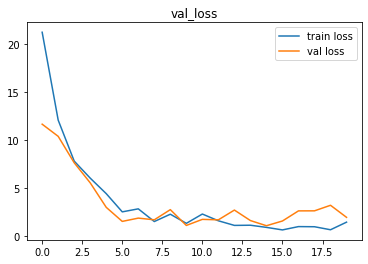

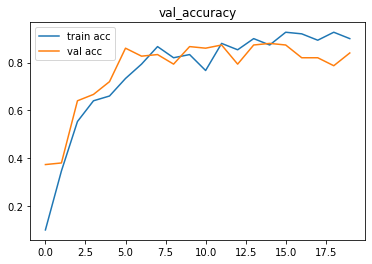

In [22]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.title('val_loss') 
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.title('val_accuracy') 
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

# Using nasnetmobile again training the few shot data

In [23]:
# import necessary library
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf

# importing transfer learning model

In [24]:
model2 = tf.keras.applications.NASNetMobile(input_shape=(224,224,3), weights='imagenet', include_top=False)

# preprocessing pre trained model

In [25]:
for layer in model2.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [26]:
y = Flatten()(model2.output)

## adding layer for classification

In [27]:
prediction2 = Dense(30, activation='softmax')(y)

In [28]:
# create a model object
modeln2 = Model(inputs=model2.input, outputs=prediction2)

# Training the transfer learning model

In [29]:
modeln2.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [30]:
b= modeln2.fit(training_set, validation_data = val_set,callbacks= earlystop,epochs = 30)

Epoch 1/30
5/5 [==============================] - 26s 4s/step - loss: 13.1125 - accuracy: 0.0602 - val_loss: 7.6267 - val_accuracy: 0.3200
Epoch 2/30
5/5 [==============================] - 12s 3s/step - loss: 7.5150 - accuracy: 0.3121 - val_loss: 5.6521 - val_accuracy: 0.4067
Epoch 3/30
5/5 [==============================] - 12s 3s/step - loss: 5.4372 - accuracy: 0.4699 - val_loss: 5.2453 - val_accuracy: 0.5200
Epoch 4/30
5/5 [==============================] - 12s 3s/step - loss: 4.2585 - accuracy: 0.5947 - val_loss: 3.7170 - val_accuracy: 0.5800
Epoch 5/30
5/5 [==============================] - 12s 3s/step - loss: 3.1065 - accuracy: 0.6579 - val_loss: 3.9124 - val_accuracy: 0.6267
Epoch 6/30
5/5 [==============================] - 12s 3s/step - loss: 3.3746 - accuracy: 0.6555 - val_loss: 2.7126 - val_accuracy: 0.6933
Epoch 7/30
5/5 [==============================] - 13s 3s/step - loss: 2.5653 - accuracy: 0.6722 - val_loss: 3.4572 - val_accuracy: 0.6400
Epoch 8/30
5/5 [=================

### accuracy and losses

In [31]:
test_loss, test_acc =modeln2.evaluate(test_set,verbose = 2)
print("Test accuracy: ",test_acc)

48/48 - 60s - loss: 2.0886 - accuracy: 0.7681
Test accuracy:  0.7680781483650208


In [32]:
print("Test loss: ",test_loss)

Test loss:  2.088552236557007


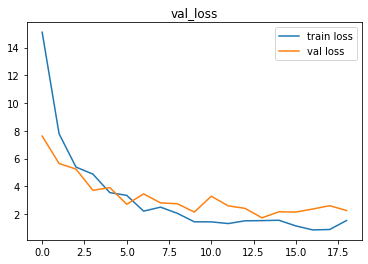

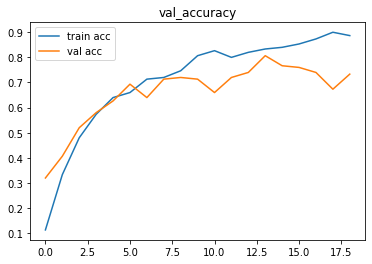

In [33]:
# plot the loss
plt.plot(b.history['loss'], label='train loss')
plt.plot(b.history['val_loss'], label='val loss')
plt.title('val_loss') 
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(b.history['accuracy'], label='train acc')
plt.plot(b.history['val_accuracy'], label='val acc')
plt.title('val_accuracy') 
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')